In [506]:
# Impor library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Ensemble learning random forest
from sklearn.ensemble import RandomForestRegressor
#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
#xgboost
import xgboost as xgb

In [507]:
# Membaca dataset
retail_data = pd.read_csv('dataset/train.csv')

In [508]:
print(retail_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [509]:
print(retail_data.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [510]:
# Memilih fitur yang relevan dan target
X = retail_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]
y = retail_data['Item_Outlet_Sales']

In [511]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [512]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LINEAR REGRESSION

In [513]:
# Inisialisasi model regresi linier
linear_model = LinearRegression()

In [514]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (6818, 4)
Shape of y_train: (6818,)


In [515]:
# Melatih model pada data latih
linear_model.fit(X_train, y_train)

LinearRegression()

In [516]:
# Membuat prediksi menggunakan data uji
linear_predictions = linear_model.predict(X_test)

In [517]:
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmse = root_mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print('Linear Regression Mean Absolute Error:', linear_mae)
print('Linear Regression Root Mean Squared Error:', linear_rmse)
print('Linear Regression R-squared:', linear_r2)

Linear Regression Mean Absolute Error: 997.5241718641935
Linear Regression Root Mean Squared Error: 1339.8932988456386
Linear Regression R-squared: 0.33946511245938005


## RANDOMFORESTREGRESSOR

In [518]:
#randomforest
random_forest_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [519]:
rf_predictions = random_forest_model.predict(X_test)

In [520]:
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = root_mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print('Random Forest Mean Absolute Error:', rf_mae)
print('Random Forest Root Mean Squared Error:', rf_rmse)
print('Random Forest R-squared:', rf_r2)

Random Forest Mean Absolute Error: 884.9334290760422
Random Forest Root Mean Squared Error: 1256.5953949328755
Random Forest R-squared: 0.419039964434907


## XGBOOST

In [521]:
#xgboost
xg_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 3, alpha = 10, n_estimators = 100)

In [522]:
#latih model
xg_model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [523]:
#predict
xg_predictions = xg_model.predict(X_test)

In [524]:
#performa
xgb_mae = mean_absolute_error(y_test, xg_predictions)
xgb_rmse = root_mean_squared_error(y_test, xg_predictions)
xgb_r2 = r2_score(y_test, xg_predictions)

print('XGBoost Mean Absolute Error:', xgb_mae)
print('XGBoost Root Mean Squared Error:', xgb_rmse)
print('XGBoost R-squared:', xgb_r2)

XGBoost Mean Absolute Error: 932.0108569709898
XGBoost Root Mean Squared Error: 1261.42197272735
XGBoost R-squared: 0.4145684631251155


## GRADIENTBOOST

In [525]:
#gradientboost
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [526]:
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [527]:
gb_predictions = gradient_boosting_model.predict(X_test)

In [528]:
#performa
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = root_mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print('Gradient Boosting Mean Absolute Error:', gb_mae)
print('Gradient Boosting Root Mean Squared Error:', gb_rmse)
print('Gradient Boosting R-squared:', gb_r2)

Gradient Boosting Mean Absolute Error: 877.8500614419748
Gradient Boosting Root Mean Squared Error: 1227.313250299006
Gradient Boosting R-squared: 0.4458004402401232


In [529]:
# Evaluasi model
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Mean Absolute Error:', mae)
    print(f'{model_name} Root Mean Squared Error:', rmse)
    print(f'{model_name} R-squared:', r2)
    return mae, rmse, r2


## MAE, RMSE, R2

In [530]:
linear_mae, linear_rmse, linear_r2 = evaluate_model(y_test, linear_predictions, 'Linear Regression')
print('\n')
rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, rf_predictions, 'Random Forest')
print('\n')
xgb_mae, xgb_rmse, xgb_r2 = evaluate_model (y_test, xg_predictions, 'XGBoost')
print('\n')
gb_mae, gb_rmse, gb_r2 = evaluate_model(y_test, gb_predictions, 'Gradient Boosting')

Linear Regression Mean Absolute Error: 997.5241718641935
Linear Regression Root Mean Squared Error: 1339.8932988456386
Linear Regression R-squared: 0.33946511245938005


Random Forest Mean Absolute Error: 884.9334290760422
Random Forest Root Mean Squared Error: 1256.5953949328755
Random Forest R-squared: 0.419039964434907


XGBoost Mean Absolute Error: 932.0108569709898
XGBoost Root Mean Squared Error: 1261.42197272735
XGBoost R-squared: 0.4145684631251155


Gradient Boosting Mean Absolute Error: 877.8500614419748
Gradient Boosting Root Mean Squared Error: 1227.313250299006
Gradient Boosting R-squared: 0.4458004402401232


## PREDIKSI

In [531]:
# Prediksi penjualan menggunakan model-model yang telah dilatih
linear_sales_prediction = linear_model.predict(X_test)
rf_sales_prediction = random_forest_model.predict(X_test)
gb_sales_prediction = gradient_boosting_model.predict(X_test)

# Output hasil prediksi
print("Prediksi Penjualan Retail:")
print("- Model Random Forest:", rf_sales_prediction)
print("- Model Gradient Boosting:", gb_sales_prediction)
print("- Model XGBoost:", xg_predictions)

# Output nilai aktual
print("\nNilai Aktual Penjualan Retail:")
print(y_test.values)

Prediksi Penjualan Retail:
- Model Linear Regression: [1565.86643531  662.37304484  742.33483262 ...  914.36351422  281.5730315
 1700.38223491]
- Model Random Forest: [1119.90842234  759.98095747  676.21348122 ...  738.98383296  652.74374967
 1634.30049223]
- Model Gradient Boosting: [1351.67718678  725.52031639  711.41610446 ...  718.2779891   630.50708708
 1614.17294743]
- Model XGBoost: [1602.5227   984.837   1025.6438  ... 1010.45197  646.1541  1746.3347 ]

Nilai Aktual Penjualan Retail:
[1743.0644  356.8688  377.5086 ...  629.181   253.004   976.7286]


In [532]:
y_test_actual = y_test.values.tolist()
for prediksi_linear, prediksi_rf, prediksi_gb, prediksi_xg, aktual in zip(linear_predictions, rf_predictions, gb_predictions, xg_predictions, y_test_actual):
    print("Linear Regression Prediksi:", prediksi_linear, "| Random Forest Prediksi:", prediksi_rf, "| Gradient Boosting Prediksi:", prediksi_gb, "| XGBoost Prediksi:", prediksi_xg, "| Aktual:", aktual)


Linear Regression Prediksi: 1565.8664353062595 | Random Forest Prediksi: 1119.9084223380896 | Gradient Boosting Prediksi: 1351.677186775391 | XGBoost Prediksi: 1602.5227 | Aktual: 1743.0644
Linear Regression Prediksi: 662.3730448355091 | Random Forest Prediksi: 759.9809574678878 | Gradient Boosting Prediksi: 725.5203163949358 | XGBoost Prediksi: 984.837 | Aktual: 356.8688
Linear Regression Prediksi: 742.3348326154519 | Random Forest Prediksi: 676.2134812229317 | Gradient Boosting Prediksi: 711.4161044629511 | XGBoost Prediksi: 1025.6438 | Aktual: 377.5086
Linear Regression Prediksi: 2980.0306468072667 | Random Forest Prediksi: 3515.041866179435 | Gradient Boosting Prediksi: 3500.424925896638 | XGBoost Prediksi: 3134.175 | Aktual: 5778.4782
Linear Regression Prediksi: 3236.5735911306983 | Random Forest Prediksi: 3035.798482086584 | Gradient Boosting Prediksi: 3305.6981279612432 | XGBoost Prediksi: 3101.6191 | Aktual: 2356.932
Linear Regression Prediksi: 605.5012271644009 | Random Forest

## PENGGABUNGAN ALGORTIMA

In [533]:
ensemble_predictions = (rf_predictions + gb_predictions + xg_predictions) / 3

In [534]:
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(root_mean_squared_error(y_test, ensemble_predictions))
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print('Ensemble Mean Absolute Error:', ensemble_mae)
print('Ensemble Root Mean Squared Error:', ensemble_rmse)
print('Ensemble R-squared:', ensemble_r2)

Ensemble Mean Absolute Error: 882.9176441256714
Ensemble Root Mean Squared Error: 35.067317163917075
Ensemble R-squared: 0.44362770503708826


In [535]:
for prediksi_ensemble, aktual in zip (ensemble_predictions, y_test_actual):
    print("Ensemble : ", prediksi_ensemble, "Aktual : ",aktual)

Ensemble :  1358.0361047305353 Aktual :  1743.0644
Ensemble :  823.4460829868267 Aktual :  356.8688
Ensemble :  804.4244615046692 Aktual :  377.5086
Ensemble :  3383.213946968066 Aktual :  5778.4782
Ensemble :  3147.7052502242755 Aktual :  2356.932
Ensemble :  718.9716648001522 Aktual :  865.54
Ensemble :  3065.4616675003836 Aktual :  4613.994
Ensemble :  1893.5900760127026 Aktual :  2410.8618
Ensemble :  1453.7348518604913 Aktual :  1948.1308
Ensemble :  2881.598237390814 Aktual :  1937.478
Ensemble :  366.54684587537486 Aktual :  210.3928
Ensemble :  4781.884208359273 Aktual :  255.0014
Ensemble :  4171.09629805062 Aktual :  4541.4218
Ensemble :  940.8470872231001 Aktual :  657.8104
Ensemble :  913.1955790666137 Aktual :  578.5802
Ensemble :  4289.166253222048 Aktual :  4229.1616
Ensemble :  1870.359328000103 Aktual :  1267.0174
Ensemble :  1692.46436669521 Aktual :  2388.8904
Ensemble :  1959.5848037820751 Aktual :  1797.66
Ensemble :  1677.9949851407118 Aktual :  4447.544
Ensemble 

## AKURASI

In [536]:
# Hitung nilai maksimal dari target
max_target = y_test.max()

# Menghitung akurasi untuk setiap model
linear_accuracy = 100 * (1 - linear_rmse / max_target)
rf_accuracy = 100 * (1 - rf_rmse / max_target)
gb_accuracy = 100 * (1 - gb_rmse / max_target)
xg_accuracy = 100 * (1 - xgb_rmse / max_target)
ensemble_accuracy = 100 * (1 - ensemble_rmse / max_target)

print('Akurasi Linear Regression :', linear_accuracy, '%')
print('Akurasi XGBoost : ', xg_accuracy, '%')
print('Akurasi Random Forest :', rf_accuracy, '%')
print('Akurasi Gradient Boosting : ', gb_accuracy, '%')
print('Akurasi Ensemble: ', ensemble_accuracy, '%')

Akurasi Linear Regression : 86.9108543658401 %
Akurasi XGBoost :  87.67742482078067 %
Akurasi Random Forest : 87.72457467944547 %
Akurasi Gradient Boosting :  88.01062600601264 %
Akurasi Ensemble:  99.65743449739377 %


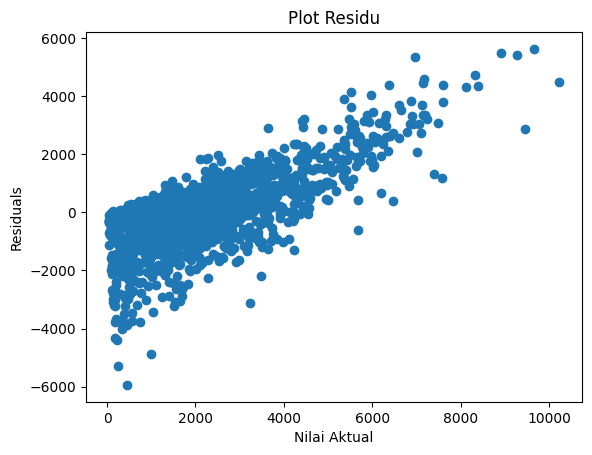

In [537]:
residuals = y_test - rf_predictions
plt.scatter(y_test, residuals)
plt.xlabel('Nilai Aktual')
plt.ylabel('Residuals')
plt.title('Plot Residu')
plt.show()

## VISUALISASI

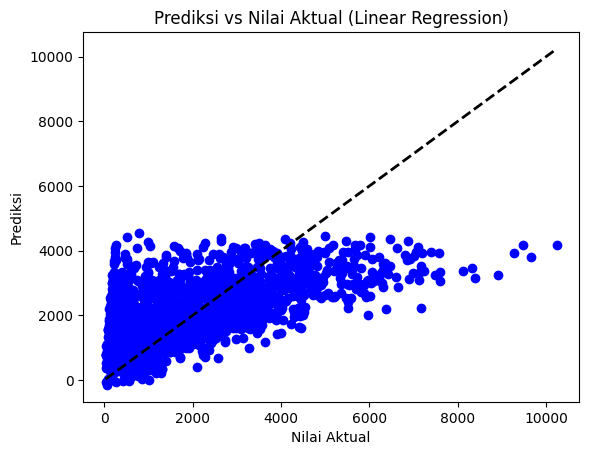

In [538]:
# Visualisasi prediksi vs nilai aktual untuk model regresi linear
plt.scatter(y_test, linear_predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi') 
plt.title('Prediksi vs Nilai Aktual (Linear Regression)')
plt.show()

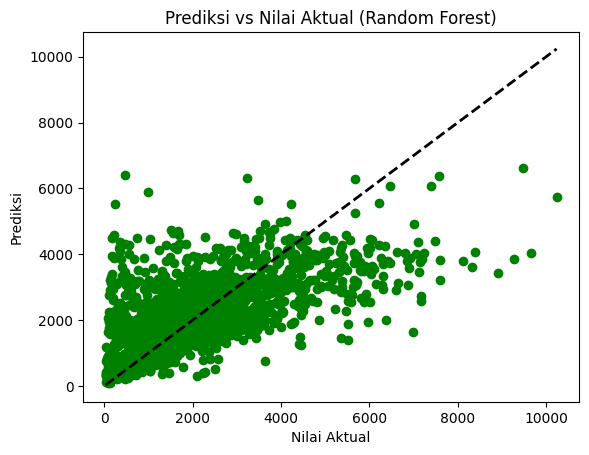

In [539]:
# Visualisasi prediksi vs nilai aktual untuk model Random Forest
plt.scatter(y_test, rf_predictions, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Aktual (Random Forest)')
plt.show()

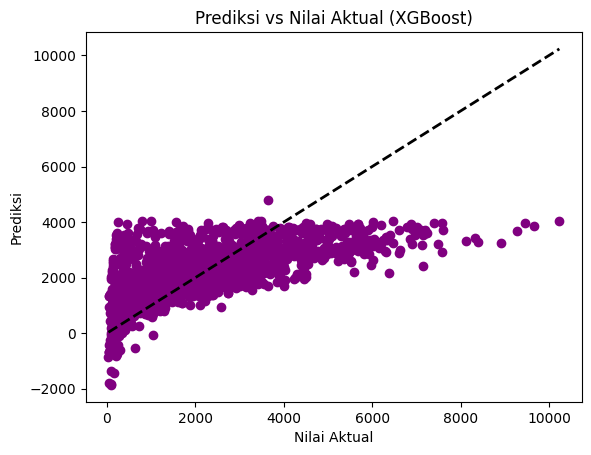

In [540]:
#xgboost
plt.scatter(y_test, xg_predictions, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Aktual (XGBoost)')
plt.show()

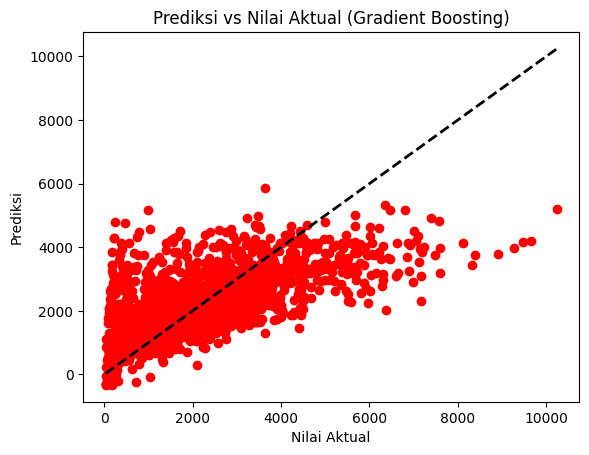

In [541]:
# Visualisasi prediksi vs nilai aktual untuk model Gradient Boosting
plt.scatter(y_test, gb_predictions, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Aktual (Gradient Boosting)')
plt.show()

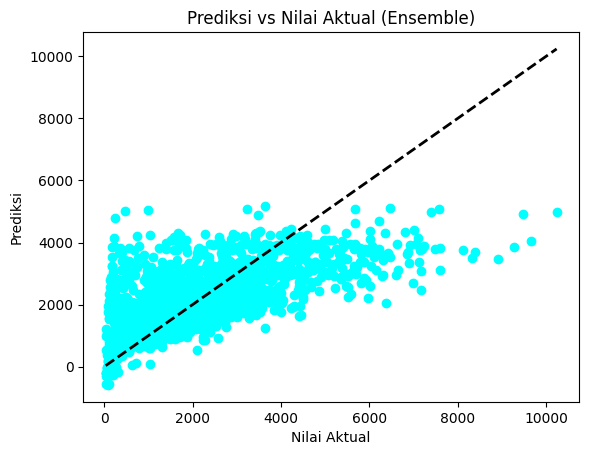

In [542]:
plt.scatter(y_test, ensemble_predictions, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Aktual (Ensemble)')
plt.show()